In [ ]:
import csv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time


def getSBD(sbd):
    if (sbd < 10):
        return f"02000{sbd}"
    elif (sbd < 100):
        return f"0200{sbd}"
    elif (sbd < 1000):
        return f"020{sbd}"
    else:
        return f"02{sbd}"


chrome_options = Options()
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--window-size=1920x1080")
driver = webdriver.Chrome(chrome_options=chrome_options,
                          executable_path="D:/chromedriver_win32/chromedriver.exe")
url = "http://bacninh.edu.vn/diem-thi-2021"

header = ['Số báo danh', 'Họ và tên', 'Ngày sinh', 'Trường', 'Điểm Khuyến khích', 'Ngữ Văn', 'Tiếng Anh', 'Toán Tự Luận',
          'Toán Trắc Nghiệm', 'Tổng toán', 'Môn Chuyên', 'Tổng Chuyên', 'Tổng đại trà']
employee_file = open('diem-thi.csv', mode='w',
                     encoding='utf-8-sig', newline='')
employee_writer = csv.writer(employee_file)
employee_writer.writerow(header)

driver.get(url)
time.sleep(1)

for i in range(844):
    sbd_field = driver.find_element_by_css_selector(
        "#form15 > input.search_init.text_filter.form-control.wp-100")
    sbd_field.send_keys(getSBD(i + 1))
    submit_button = driver.find_element_by_css_selector('#form15 > button')
    submit_button.click()
    row = []
    for index in range(13):
        sbd = driver.find_element_by_css_selector(
            f'#module1015 > div.table-responsive > table > tbody > tr > td:nth-child({index + 1})')
        try:
            row.append(sbd.text)
        except:
            sbd = driver.find_element_by_css_selector(
                f'#module1015 > div.table-responsive > table > tbody > tr > td:nth-child({index + 1})')
            try:
                print(f"Try again at {getSBD(i + 1)} with field {index + 1}")
                row.append(sbd.text)
            except:
                row.append("")
                print(f"error at {getSBD(i + 1)} with field {index + 1}")
    employee_writer.writerow(row)

    sbd_field.clear()
employee_file.close()


C:\Users\bigpl\AppData\Local\Temp/ipykernel_7248/2266291186.py:21: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options,


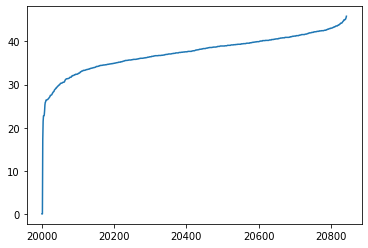

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("diem-thi.csv")
x = dataframe.get("Số báo danh")
dataframe = dataframe.sort_values("Tổng đại trà")
y = dataframe.get("Tổng đại trà")
plt.plot(x, y)
plt.show() 

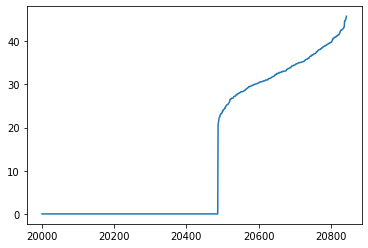

In [6]:
dataframe = dataframe.sort_values("Tổng Chuyên")
y = dataframe.get("Tổng Chuyên")
plt.plot(x, y)
plt.show() 